# Homework 9 (DL Monday, December 4 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

In [12]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

#### Consider the following 1D non-linear model
$$
x_k = x_{k-1} - 0.01sin(x_{k-1}) + q_{k-1}\\
y_k = 0.5sin(2x_k)+ r_k
$$
where $q_{k-1}$ has variance of $0.01^2$ and $r_k$ has variance of $0.02^2$.

### Part a (1 point): Simulate 100 steps of states and measurements from the model. Plot the data.

In [13]:
def model_simulation(seed_number, steps):
    """ 
    1D non-linear model simulation
    -------
    Input:
        seed_number: it is used to generate the same sequence of random numbers
        steps: number of steps
    Output:
        xs: state trajectory
        ys: measurement tajectory
        
    """
    np.random.seed(seed_number)      # do not change this line
    xs = np.zeros((steps, 1))        # do not change this line
    ys = np.zeros((steps, 1))        # do not change this line
    # To draw random samples from a normal (Gaussian) distribution, you could use np.random.normal function
    # Attention: the arguments of np.random.normal are mean and "Standard deviation"
    # YOUR CODE HERE
    for i in range(1, steps):
        q = np.random.normal(0, 0.01)
        r = np.random.normal(0, (0.02))
        xs[i] = xs[i-1] -0.01*np.sin(xs[i-1]) + q
        ys[i] = 0.5*np.sin(2*xs[i]) + r
    # raise NotImplementedError()
    return xs, ys # do not change this line

Feel free to uncomment and run the given code below.

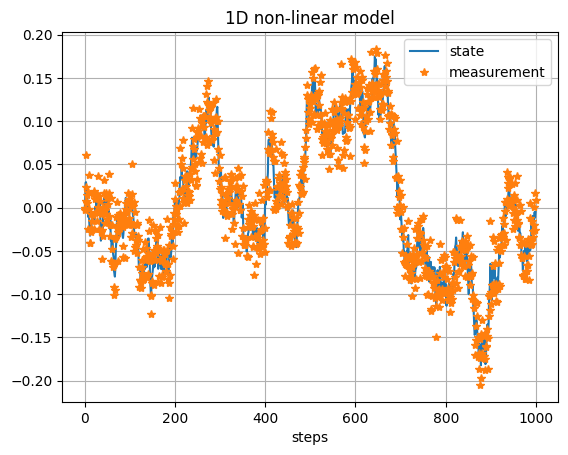

In [14]:
xs, ys = model_simulation(5, 1000)
plt.plot(xs, label='state')
plt.plot(ys, '*', label='measurement')
plt.title('1D non-linear model')
plt.xlabel('steps')
plt.legend()
plt.grid();

/tmp/ipykernel_141403/1340739509.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j] = weights[j]*likelihood


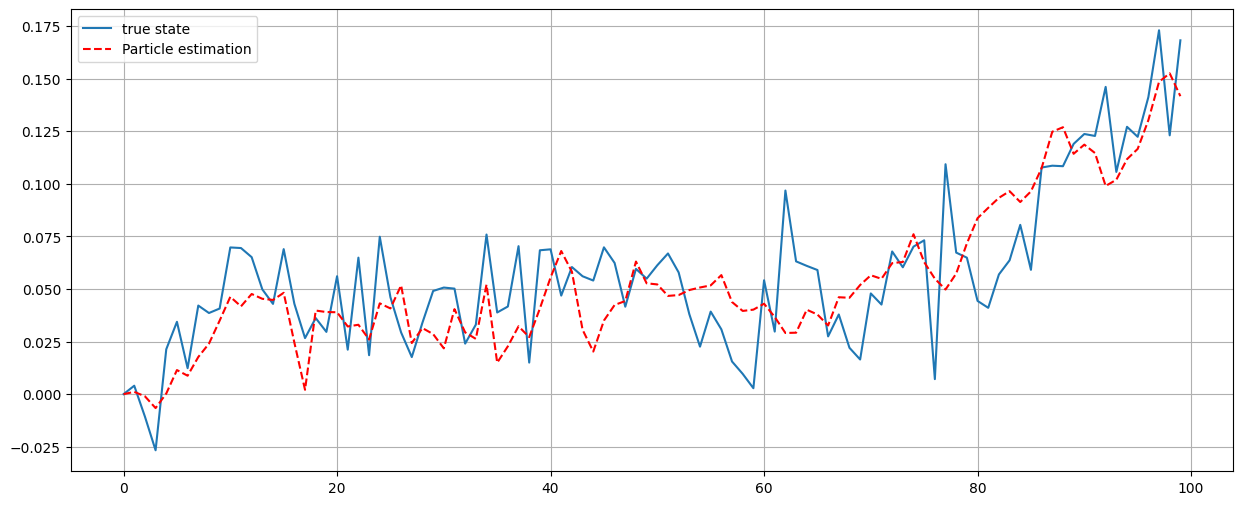

In [16]:
Number_of_particles = 100
def particle_init(seed,Number_of_particles,mean,std):
    # np.random.seed(seed)
    particles = np.random.normal(mean, std, Number_of_particles)
    # particles = np.random.uniform(-np.pi, np.pi, Number_of_particles)
    return particles
def propagateParticles(particle,seed):
    # np.random.seed(seed)
    return particle - 0.01*np.sin(particle) + np.random.normal(0, 0.01)
def compulteLikehood(particle,measurement,seed):
    # np.random.seed(seed)
    y_pred = 0.5*np.sin(2*particle) + np.random.normal(0, 0.02)
    likelyhood = 1/np.sqrt(2*np.pi*0.02**2)*np.exp(-(measurement-y_pred)**2/(2*0.02**2))
    return likelyhood
def resample(particles,weights):
    indices = np.random.choice(np.arange(len(particles)),len(particles),p=weights,replace=True)
    # resampled_particles = [particles[i] for i in indices]
    return particles[indices]

def bootstrap_particle_filter(seed,measurements):
    step = len(measurements)
    mean = np.zeros((step,1))
    var = np.zeros((step,1,1))
    Number_of_particles = 500
    weights = np.ones((Number_of_particles))

    particles = particle_init(seed,Number_of_particles,0,0.01)
    for i in range(1, step):
        for j,particle in enumerate(particles):
            particles[j] = propagateParticles(particle,seed)
            likelihood = compulteLikehood(particle,measurements[i],seed)
            weights[j] = weights[j]*likelihood
        weights = weights/np.sum(weights)
        #calculate the weighted mean
        mean[i] = np.sum(weights*particles)
        #calculate the weighted variance
        var[i]= np.sum(weights*(particles-mean[i])**2)
        #resample
        # particles = resample(particles,weights)
            
        # YOUR CODE HERE
        # raise NotImplementedError()
    return mean, var
    
observations =  model_simulation(1, 100)[1]
x_, cov_ = bootstrap_particle_filter(1,observations)
plt.figure(figsize=(15,6))
plt.plot(model_simulation(1, 100)[1], label='true state')
plt.plot(x_[:,0], 'r--', label='Particle estimation')
plt.legend()
plt.grid();